0.4392772018258546


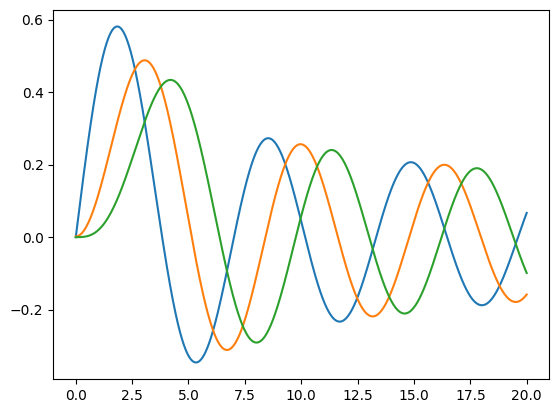

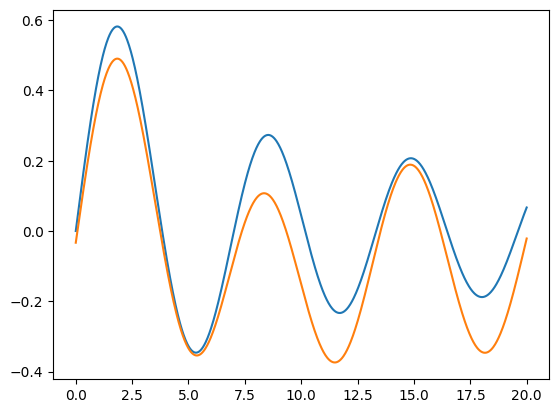

In [83]:
# Exercise 1 

# a. 
import numpy as np
from numpy import trapz
from math import pi,cos,sin,sqrt

def y(x): 
    return sin(x)

def besselint(theta,m,x): 
    return cos(m * theta - x * sin(theta))



def simp(x,y,m,z): # Takes x values for integration, a function to interpoloate, and the two bessel values
    N = len(x)
    h = (x[N-1]-x[0])/N
    sum = y(x[0],m,z) + y(x[len(x) - 1],m,z)
    j = 0
    for i in x: 
        if j % 2 == 1: 
            sum += 4 * y(i,m,z)
        if j % 2 == 0: 
            sum += 2 * y(i,m,z)
        j += 1
    return (h/3 * sum)

    
def J(m,x):
    theta = np.linspace(0,pi,1000)
    def besselint(theta,m,x): 
        return cos(m * theta - x * sin(theta))
    return 1/pi * simp(theta,besselint,m,x)

print(J(1,1))


# Plotting Swag

import matplotlib.pyplot as plt

x = np.linspace(0,20,1000)
y1 = [J(1,i) for i in x]
y2 = [J(2,i) for i in x]
y3 = [J(3,i) for i in x]

fig, ax1 = plt.subplots()
ax1.plot(x,y1,label="J1")
ax1.plot(x,y2,label="J2")
ax1.plot(x,y3,label="J3")

# b. Making a scipy version

import scipy as sp

theta = np.linspace(0,pi,1000)

y1 = [besselint(x,1,1) for x in theta]


def betterJ(m,x):
    theta = np.linspace(0,pi,1000)
    def besselint(theta,m,x): 
        return cos(m * theta - x * sin(theta))
    y = [besselint(theta,m,x) for theta in theta]
    return 1/pi * sp.integrate.simpson(y,x=theta)

def suckyJ(m,x):
    theta = np.linspace(0,pi,10)
    def besselint(theta,m,x): 
        return cos(m * theta - x * sin(theta))
    return 1/pi * simp(theta,besselint,m,x)

# Plotting Swag

x = np.linspace(0,20,1000)
goody = [betterJ(1,i) for i in x]
bady = [suckyJ(1,i) for i in x]

fig, ax2 = plt.subplots()

ax2.plot(x,goody)
ax2.plot(x,bady)


# c. 

# r = sqrt x^2 + y^2


def I(r):
    Lambda = 500
    k = 2*pi/Lambda
    return (J(1,r*k)/(k * r))


<function matplotlib.pyplot.show(close=None, block=None)>

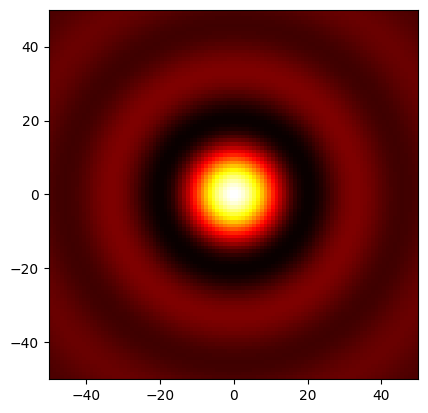

In [153]:
import numpy as np
from numpy import trapz
from math import pi,cos,sin,sqrt

def I(r):
    Lambda = 500
    k = 2*pi/Lambda
    return (betterJ(1,r*k)/(k * r))
def Ic(x,y):
    r = sqrt(x**2 + y**2)
    return I(r)


Npoints = 100



intensityarray = [[Ic(x,y) for x in np.linspace(-1000,1000,Npoints)] for y in np.linspace(-1000,1000,Npoints)]
    
inte = np.array(intensityarray)   

plt.imshow(inte, cmap='hot',interpolation='antialiased',extent=[-inte.shape[1]/2, inte.shape[1]/2, -inte.shape[0]/2, inte.shape[0]/2])
plt.show

8.533333333333335e-15
4.40000001603632


<function matplotlib.pyplot.show(close=None, block=None)>

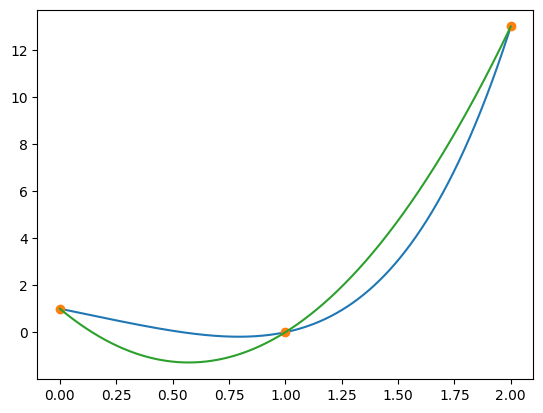

In [225]:
# Exercise 3 

def f(x): 
    return x**4 - 2*x + 1

def trapz(x,y): 
    N = 10000
    h = (x[-1] - x[0])/(N)
    sum = 0
    for i in x: 
        sum += y(i)
    sum -= y(x[-1])/2 + y(x[0])/2
    
    return (h/2)*sum

def traperror(y): 
    N = 10000
    h = (x[-1] - x[0])/(N)
    z = np.linspace(0,2,N)
    l = max(z)
    return h**3 * y(l)

    
    
    
x = np.linspace(0,2,100)
    
# print(trapz(x,f))
# print(traperror(f))


# b. 
x = np.linspace(0,2,1000)


def simperr(): 
    N = 1000
    h = (x[-1]-x[0])/N
    return (h**5)/90 * 24

print(simperr())
print(sp.integrate.simpson(f(x),x))

#c. 

x = np.linspace(0,2,10000)
y = f(x)
xi = [0,1,2]
xi = np.array(xi)
yi = f(xi)
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot(xi,yi,linestyle='none',marker='o')

def yp(x): 
    return 7 * x**2 -  8*x + 1

ypoly = yp(x)

ax.plot(x,ypoly)

plt.show
